In [8]:
import os, config, itertools, logging
import sherpa.astro.ui as shp

In [9]:
# configure plotting
%matplotlib inline
shp.set_ylog('data')

In [10]:
# configure fitting
shp.set_conf_opt('sigma', 1.6448536269514722) # 90% confidence interval
shp.set_stat('chi2xspecvar')
shp.set_xsabund('wilm')
shp.set_xsxsect('vern')

In [11]:
# define data of interest (ie the values you want to iterate over)
observations = ['30001002001', '30001002003', '30001002004', '30302006004', '30302006006', '30302007002', '30302007004']
regions = ['NE', 'SW']
modules = ['A', 'B']

In [41]:
# simple low energy spectral analysis

# Note that all of this code was initally written in smaller parts 
# but has been cleaned up and recombined for ease of understanding.
# Your code will look less polished as you are figuring out how to conduct an analysis,
# but it's good practice to reorganize your code when the analysis is complete.
output = []
for observation, module, region in list(itertools.product(observations, modules, regions)):
    stem = 'nu' + observation + module + region
    
    # load data
    phafile = config.PRODUCT_PATH + '/' + stem + '_sr_bin.pha'
    if not os.path.isfile(phafile): continue
    
    shp.load_pha(phafile) # load pha
    shp.subtract() # subtract background
    shp.ignore(':3.0,10.0:') # ignore  **-3.0 10.0-**
    
    # set up model
    shp.set_source(shp.xstbabs.absorption*shp.xsapec.plasma) # set model to tbasbs*apec
    # (for more info see http://cxc.cfa.harvard.edu/sherpa/ahelp/xstbabs.html 
    # and http://cxc.cfa.harvard.edu/sherpa/ahelp/xsapec.html)
    shp.reset() # reset parameter values from past iterations
    print(shp.get_source())
    
    # fit 
    shp.fit() # fit model
    fit = shp.get_fit_results()
    
    shp.conf() # calculate parameter confidence intervals
    conf = shp.get_conf_results()
    
    # calculate flux 90% CI from model
    # Note this works slightly differently from XSPEC but looks like it gives similar results to cflux
    try:
        flux = shp.sample_flux(lo=3, hi=10, num=500, confidence=90, correlated=True)
    except: # catch flux calculation failure
        flux = [[None, None, None]]
    
    # print output
    # relevant values are collected then printed with a delimiter
    # data can then be copied and pasted into a spreadsheet for further analysis
    # this can also be rewritten to store data in some data structure for further analysis here in python
    output.append([stem])
    output[-1].append(fit.rstat)
    output[-1].append(flux[0][2]) # flux min
    output[-1].append(flux[0][0]) # flux val
    output[-1].append(flux[0][1]) # flux max
    for i in range(len(conf.parvals)):
        output[-1].append(conf.parmins[i])
        output[-1].append(conf.parvals[i])
        output[-1].append(conf.parmaxes[i])
    
for line in output:
    print(','.join(str(i) for i in line))

read ARF file /home/evan/GC_spectral_analysis/experiments/fluxconsistency/products/nu30001002001ANE_sr.arf
read RMF file /home/evan/GC_spectral_analysis/experiments/fluxconsistency/products/nu30001002001ANE_sr.rmf
read background file /home/evan/GC_spectral_analysis/experiments/fluxconsistency/products/nu30001002001ANE_bk.pha
(xstbabs.absorption * xsapec.plasma)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   absorption.nH thawed      17.1405            0       100000 10^22 atoms / cm^2
   plasma.kT    thawed      8.33667        0.008           64        keV
   plasma.Abundanc frozen            1            0            5           
   plasma.redshift frozen            0       -0.999           10           
   plasma.norm  thawed   0.00200539            0        1e+24           
Dataset               = 1
Method                = levmar
Statistic             = chi2xspecvar
Initial fit sta

original model flux = 1.08578e-12, + 4.48567e-14, - 5.31555e-14
model component flux = 1.08578e-12, + 4.48567e-14, - 5.31555e-14
read ARF file /home/evan/GC_spectral_analysis/experiments/fluxconsistency/products/nu30001002003BNE_sr.arf
read RMF file /home/evan/GC_spectral_analysis/experiments/fluxconsistency/products/nu30001002003BNE_sr.rmf
read background file /home/evan/GC_spectral_analysis/experiments/fluxconsistency/products/nu30001002003BNE_bk.pha
(xstbabs.absorption * xsapec.plasma)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   absorption.nH thawed      13.7018            0       100000 10^22 atoms / cm^2
   plasma.kT    thawed      7.07751        0.008           64        keV
   plasma.Abundanc frozen            1            0            5           
   plasma.redshift frozen            0       -0.999           10           
   plasma.norm  thawed    0.0016638            0     

read ARF file /home/evan/GC_spectral_analysis/experiments/fluxconsistency/products/nu30302006006ANE_sr.arf
read RMF file /home/evan/GC_spectral_analysis/experiments/fluxconsistency/products/nu30302006006ANE_sr.rmf
read background file /home/evan/GC_spectral_analysis/experiments/fluxconsistency/products/nu30302006006ANE_bk.pha
(xstbabs.absorption * xsapec.plasma)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   absorption.nH thawed      12.5591            0       100000 10^22 atoms / cm^2
   plasma.kT    thawed      3.75583        0.008           64        keV
   plasma.Abundanc frozen            1            0            5           
   plasma.redshift frozen            0       -0.999           10           
   plasma.norm  thawed   0.00423047            0        1e+24           
Dataset               = 1
Method                = levmar
Statistic             = chi2xspecvar
Initial fit sta

Dataset               = 1
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2xspecvar
confidence 1.64485-sigma (90%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   absorption.nH      13.0659     -5.85483      6.82934
   plasma.kT         8.92733      -2.3377      5.86478
   plasma.norm    0.00166295 -0.000310365   0.00037039
original model flux = 1.19164e-12, + 1.22743e-13, - 2.55154e-13
model component flux = 1.19164e-12, + 1.22743e-13, - 2.55154e-13
read ARF file /home/evan/GC_spectral_analysis/experiments/fluxconsistency/products/nu30302007002ANE_sr.arf
read RMF file /home/evan/GC_spectral_analysis/experiments/fluxconsistency/products/nu30302007002ANE_sr.rmf
read background file /home/evan/GC_spectral_analysis/experiments/fluxconsistency/products/nu30302007002ANE_bk.pha
(xstbabs.absorption * xsapec.plasma)
   Param        Type          Val

plasma.norm lower bound:	-0.00023219
absorption.nH lower bound:	-3.23069
plasma.kT lower bound:	-1.1188
absorption.nH upper bound:	3.49935
plasma.kT upper bound:	1.38337
plasma.norm upper bound:	0.00024592
Dataset               = 1
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2xspecvar
confidence 1.64485-sigma (90%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   absorption.nH      13.5729     -3.23069      3.49935
   plasma.kT         7.73293      -1.1188      1.38337
   plasma.norm    0.00203206  -0.00023219   0.00024592
original model flux = 1.3838e-12, + 6.20758e-14, - 6.91656e-14
model component flux = 1.3838e-12, + 6.20758e-14, - 6.91656e-14
nu30001002001ANE,1.65209074249,1.8072094983891353e-12,1.903317350295953e-12,1.974112689274929e-12,-2.278143598269038,10.388029017171457,2.9452677608379307,-0.49406253501213016,4.273365095742316,

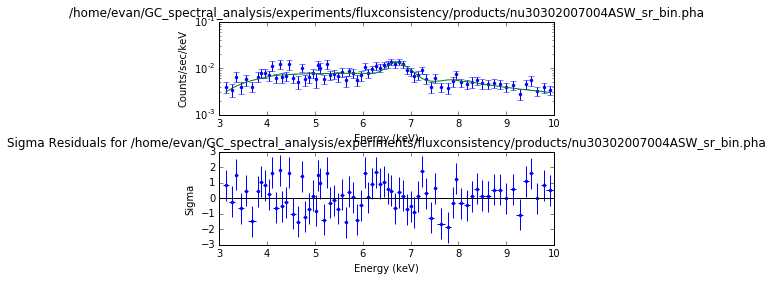

In [39]:
shp.plot('fit', 'delchi')